# Import library

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import kagglehub as kh

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load dataset

Dataset yang digunakan yaitu Mobile Price Classification yang diperoleh dari platform Kaggle.

In [2]:
path = kh.dataset_download("iabhishekofficial/mobile-price-classification")

100%|██████████| 70.6k/70.6k [00:00<00:00, 32.4MB/s]

Extracting files...


In [3]:
df = pd.read_csv(f"{path}/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



*   Terdapat 2000 baris data.
*   Terdapat 20 kolom data, dengan kolom price_range sebagai target.
*   Terdapat 18 kolom bertipe data int64 dan 2 kolom bertipe data float64.
*   Tidak ada baris data yang null.



In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Dari output dapat dilihat deskripsi statistik tiap variabel

In [6]:
df.duplicated().sum()

0

Tidak terdapat data yang duplikat

<Axes: xlabel='price_range'>

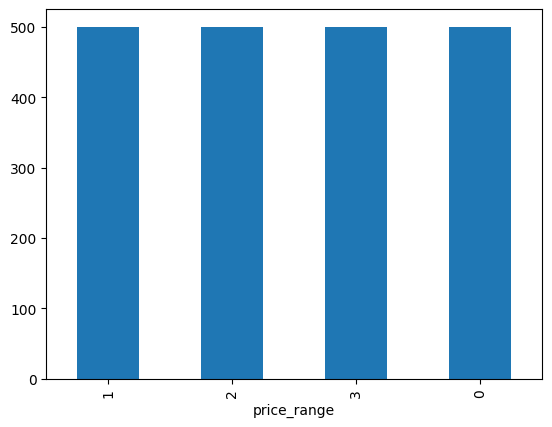

In [7]:
df['price_range'].value_counts().plot(kind='bar')

Dari output menunjukan persebaran data yang seimbang untuk setiap label

## Feature & Labels

In [8]:
X = df.drop('price_range', axis=1)
y = df['price_range']

## Categorical and Numerical Features

In [9]:
num_col = [col for col in X.columns if df[col].nunique() >= 10]
cat_col = [col for col in X.columns if col not in num_col]

In [10]:
print(f"Numerical features: {num_col}")
print(f"Categorical features: {cat_col}")

Numerical features: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Categorical features: ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']


## Univariative EDA

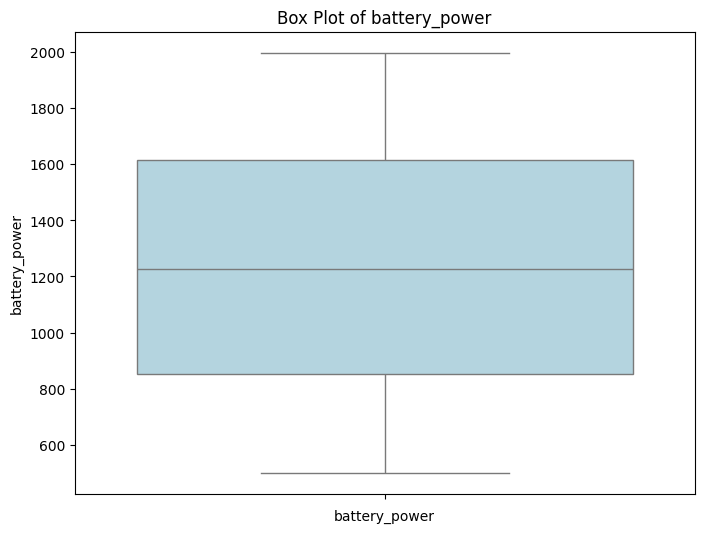

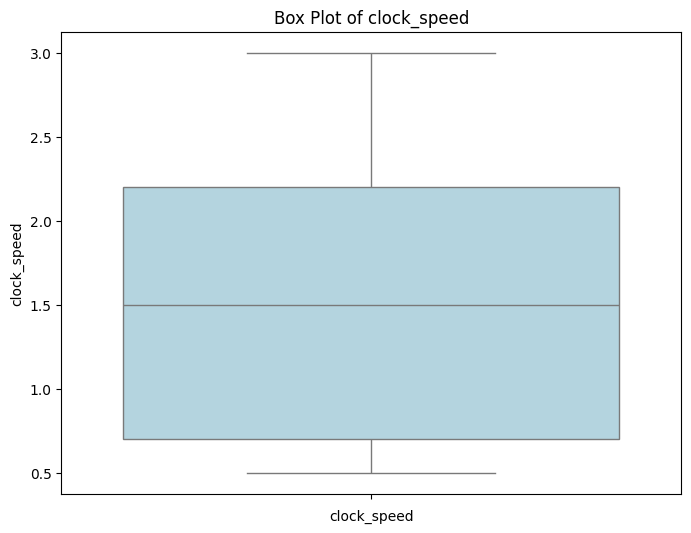

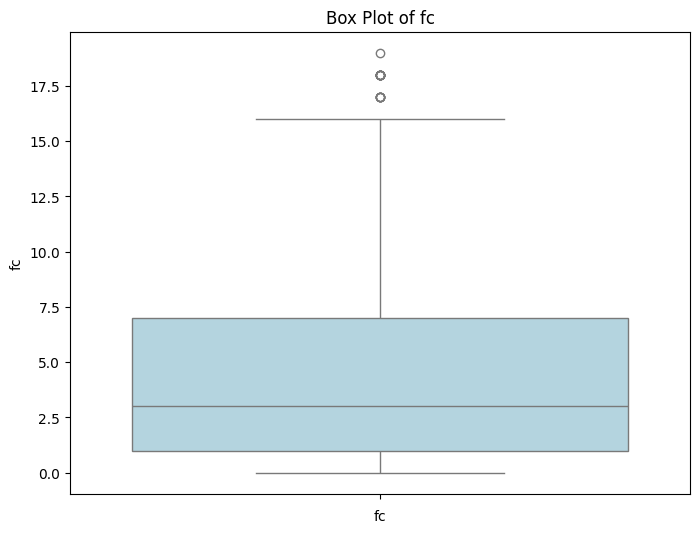

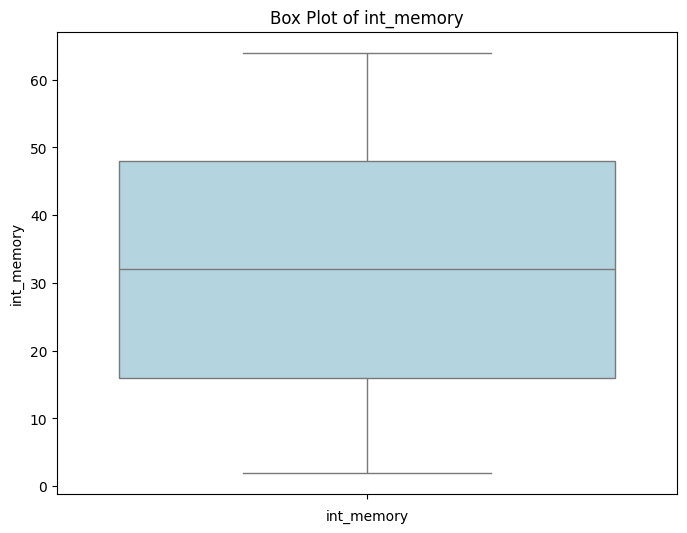

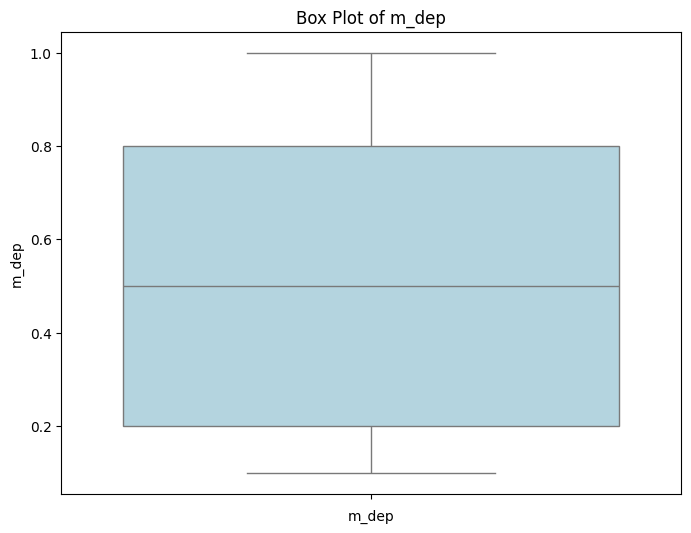

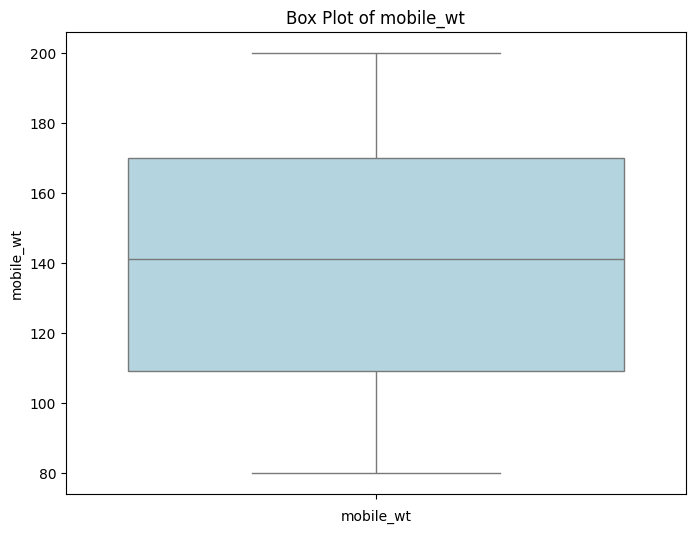

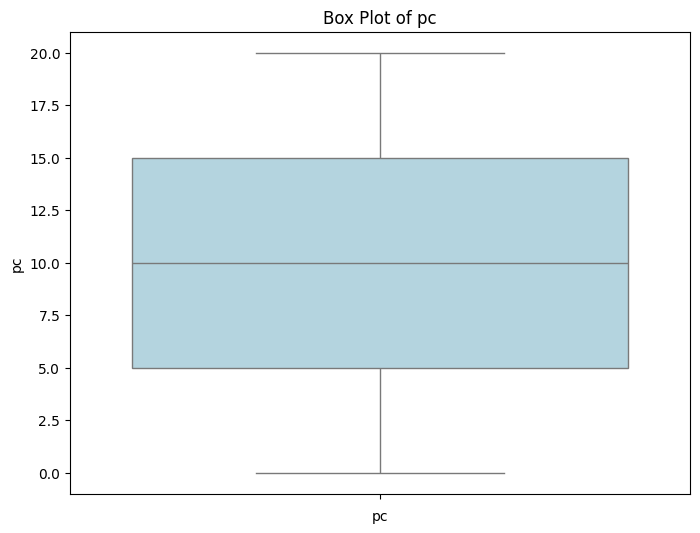

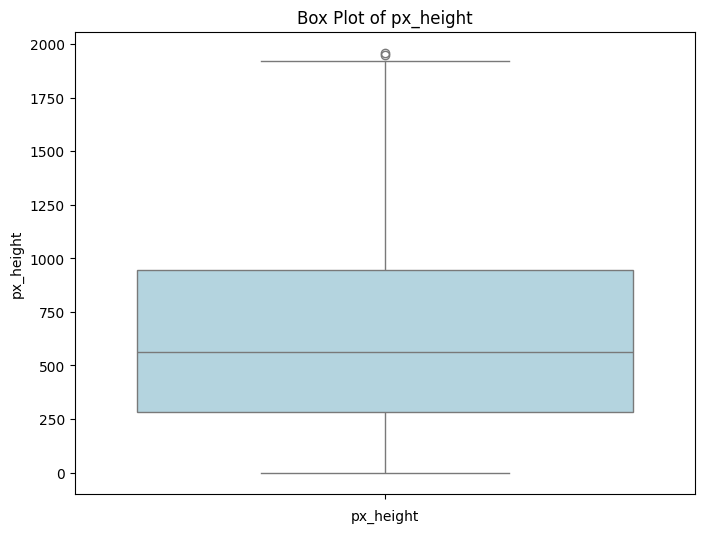

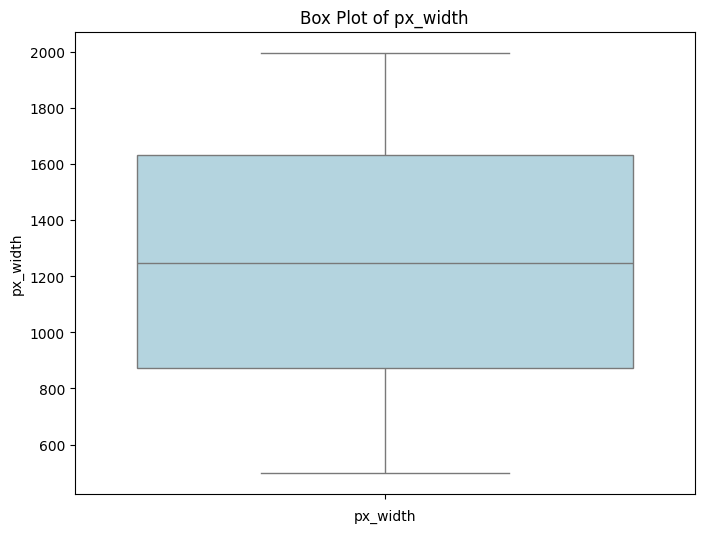

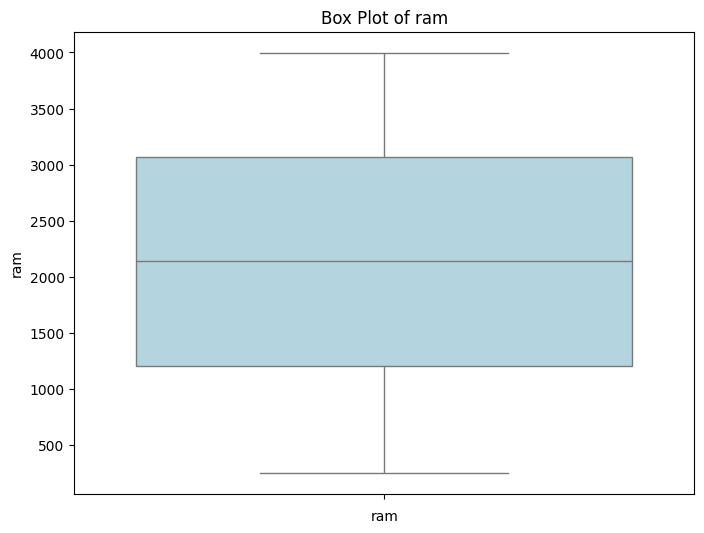

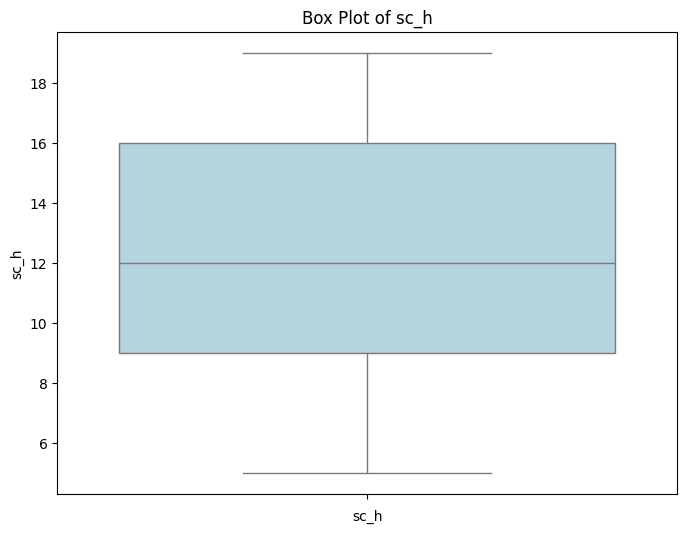

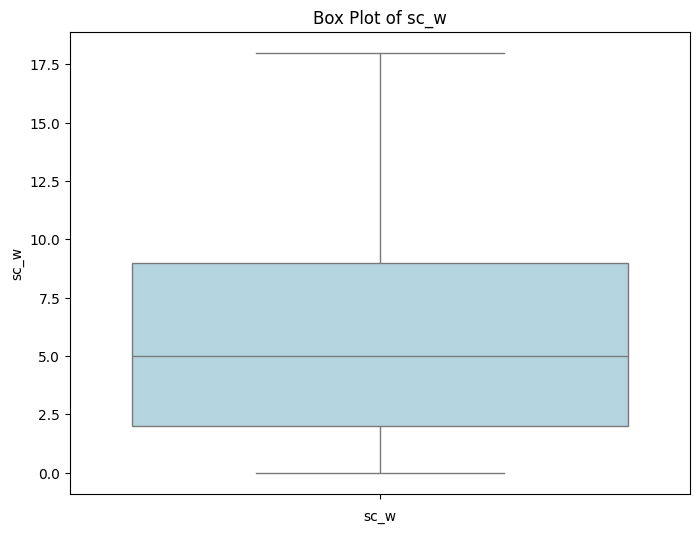

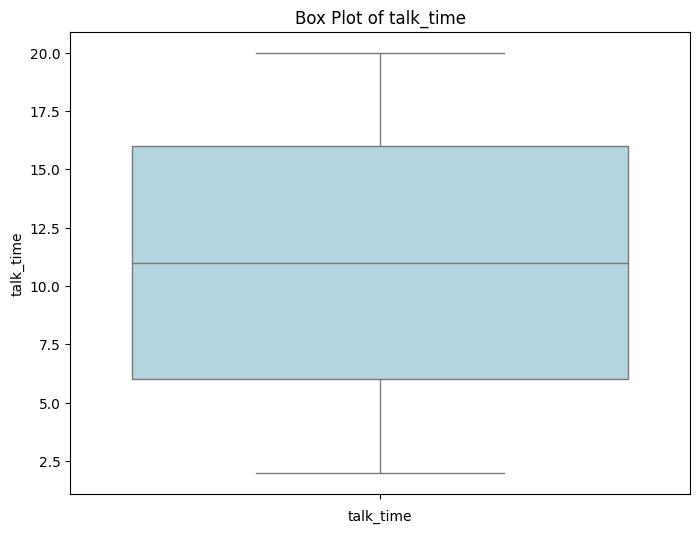

In [11]:
for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

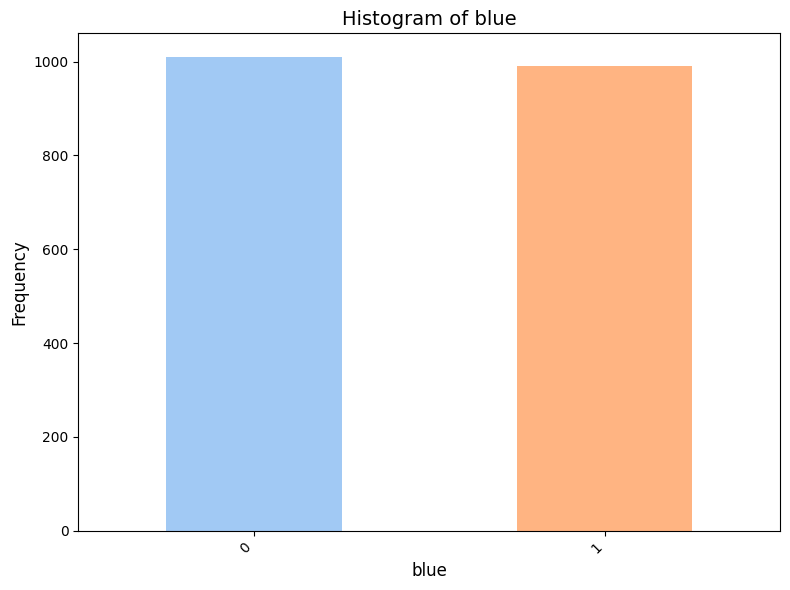

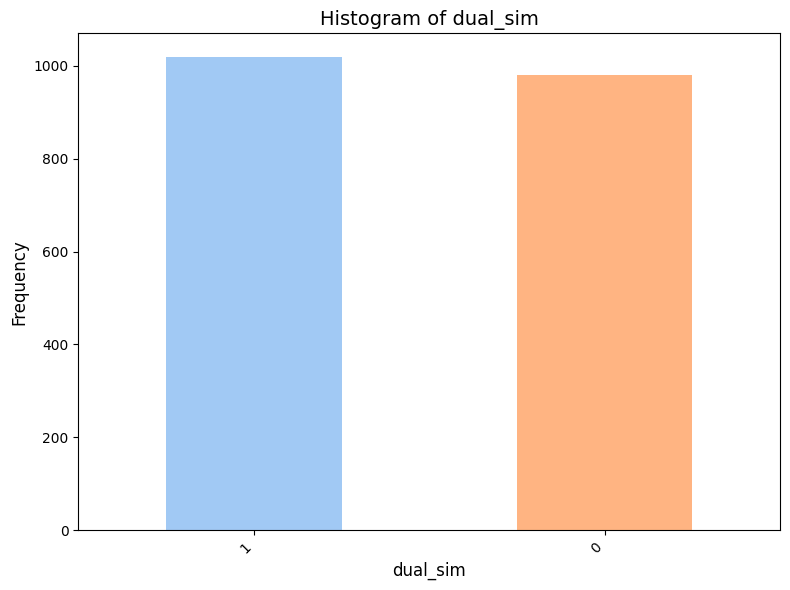

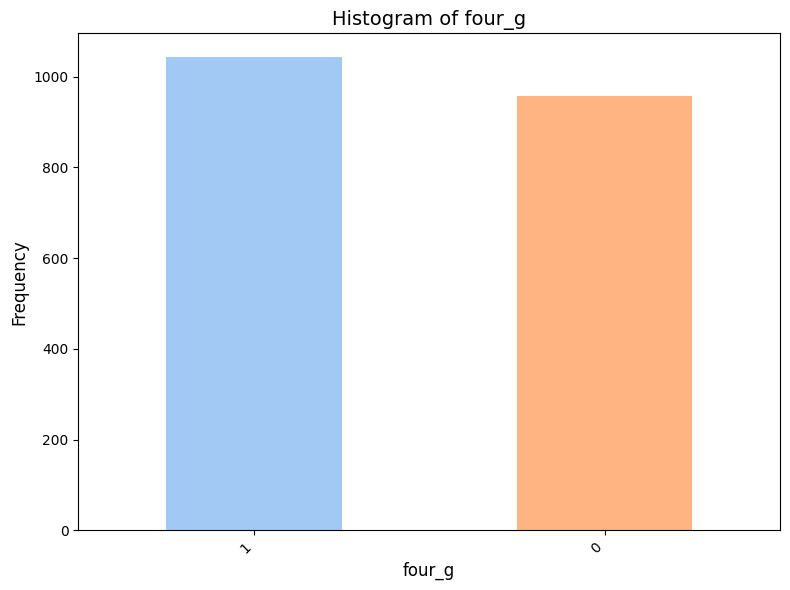

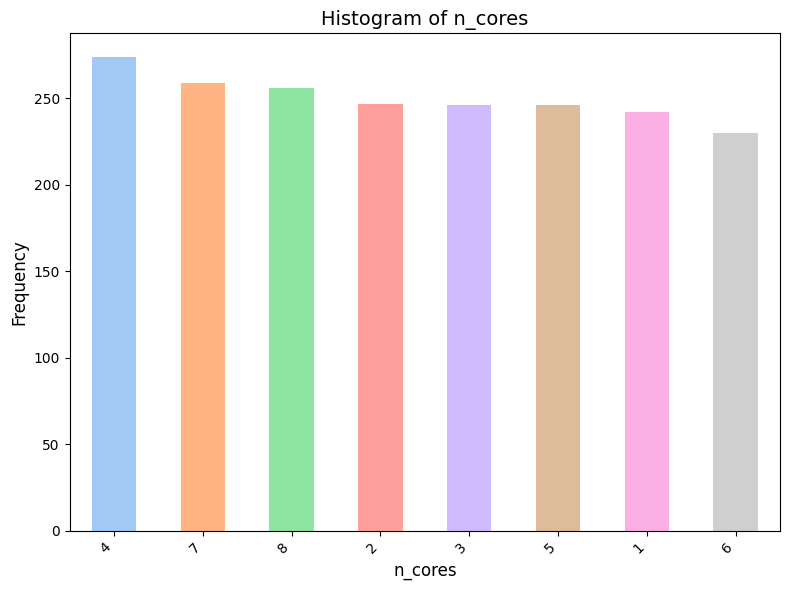

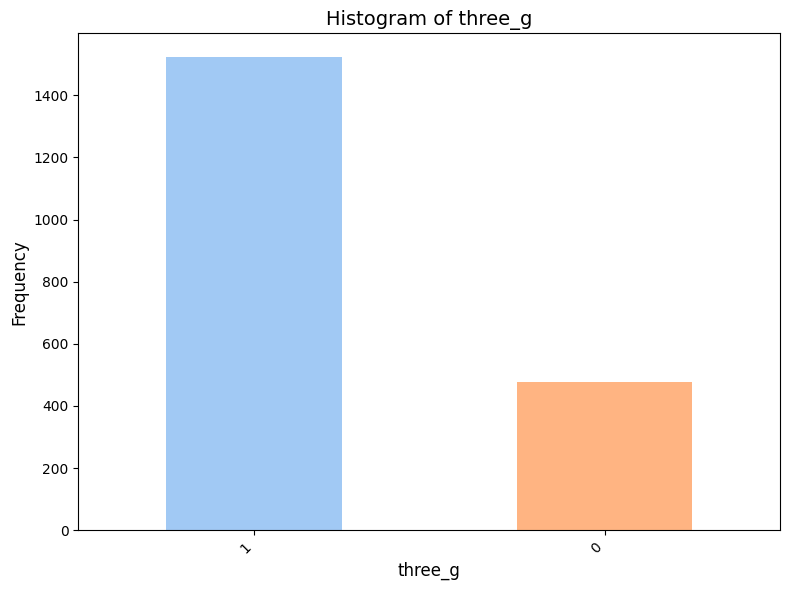

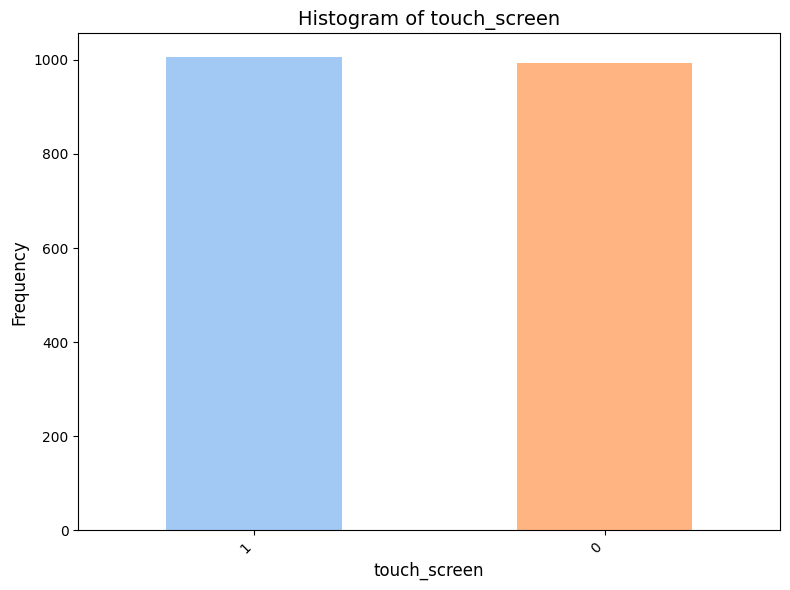

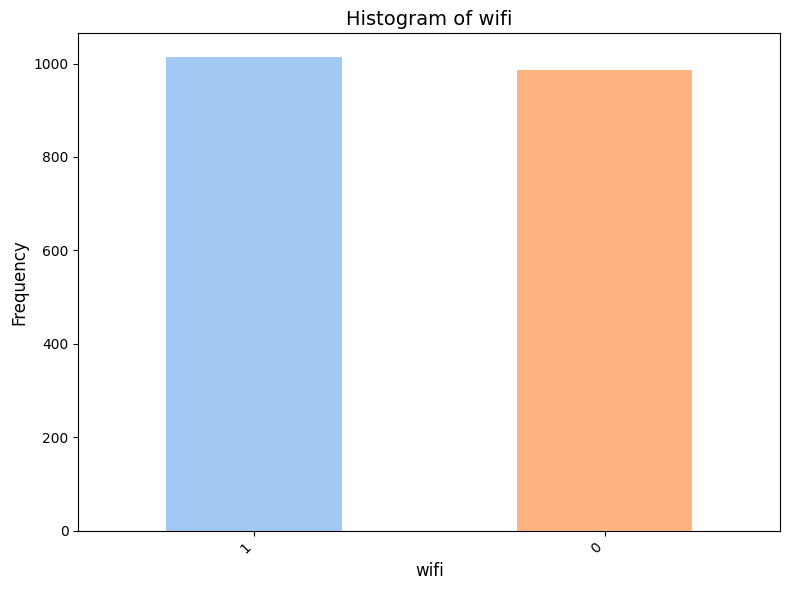

In [12]:
for col in cat_col:
    plt.figure(figsize=(8, 6))

    colors = sns.color_palette('pastel')[0:len(df[col].value_counts())]

    df[col].value_counts().plot(kind='bar', color=colors)

    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

## Multivariate EDA

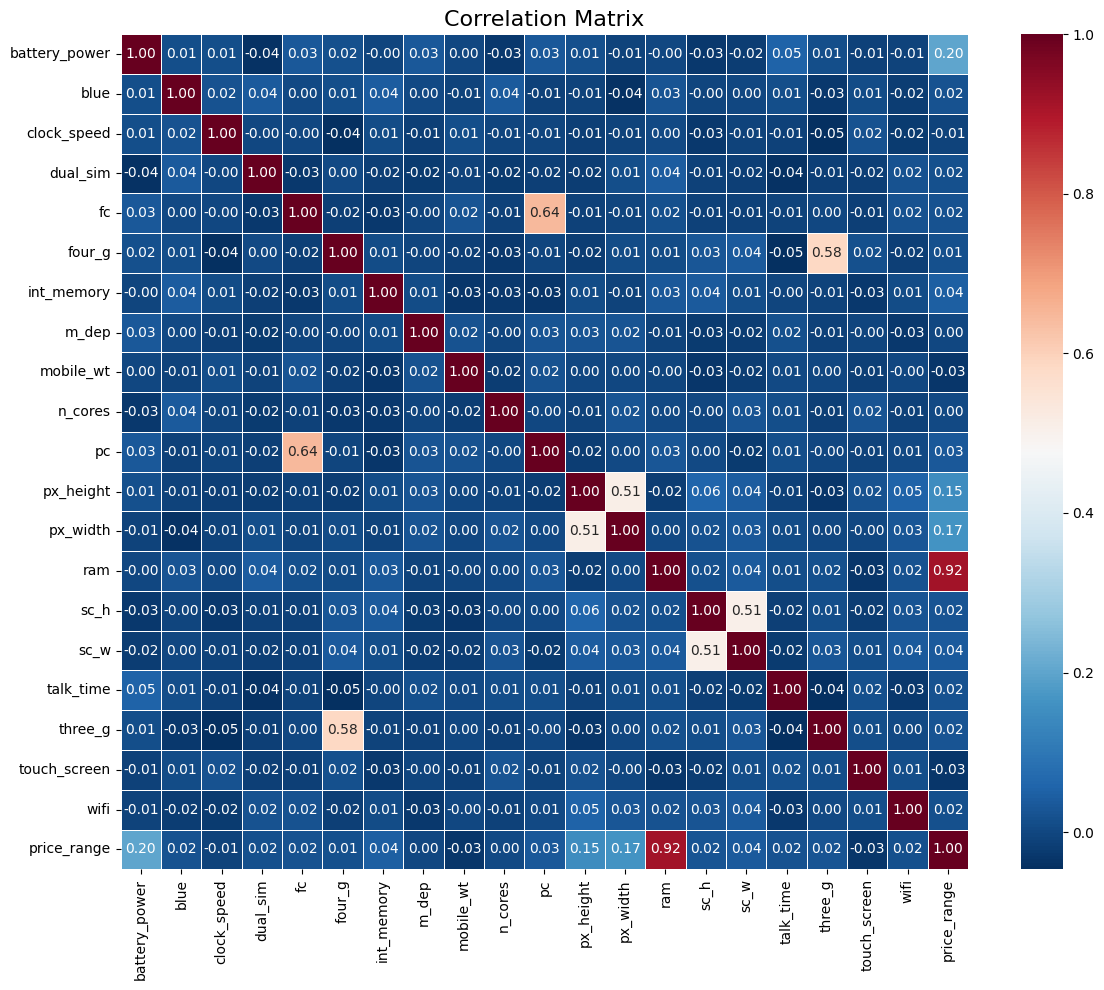

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

Dari heatmap dapat dilihat bahwa hampir seluruh fitur memiliki korelasi yang rendah terhadap targat, kecuali fitur ram

# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make Pipeline

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(), cat_col)
    ])

In [16]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [17]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Modelling and Evaluation

In [18]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_transformed, y_train)
logreg_predictions = logreg_model.predict(X_test_transformed)
print("Logistic Regression:")
print(classification_report(y_test, logreg_predictions))

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_transformed, y_train)
dt_predictions = dt_model.predict(X_test_transformed)
print("\nDecision Tree:")
print(classification_report(y_test, dt_predictions))

# Model 3: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_transformed, y_train)
rf_predictions = rf_model.predict(X_test_transformed)
print("\nRandom Forest:")
print(classification_report(y_test, rf_predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.93      1.00      0.96        91
           2       0.99      0.93      0.96        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       105
           1       0.72      0.79      0.75        91
           2       0.73      0.70      0.71        92
           3       0.87      0.89      0.88       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400


Random Forest:
              precision    recall  f1-score   support

           0       0.9

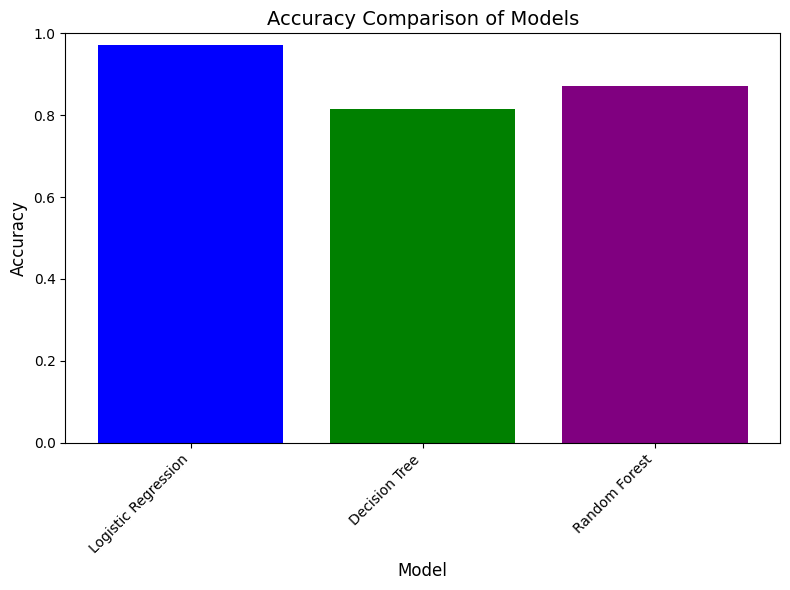

In [19]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [
    accuracy_score(y_test, logreg_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, rf_predictions)
]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'purple'])
plt.title('Accuracy Comparison of Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dari hasil pemodelan diperoleh model yang dapat digunakan untuk klasifikasi harga telepon mobile, dimana model dengan akurasi terbaik yaitu model Logistik Regression dengan akurasi 97%